# WeRateDogs: Data Acquisition, Cleaning & Analysis

by Giancarlo Marchesi

This project was part of the Udacity - Data Analyst Nanodegree coursework. The project has two sections: 

1. Data Acquisition and Cleaning: data is gathered using the Twitter API, cleaned and exported to a csv file.
2. Data Analysis: the exported file is read into a df and analyzed to attempt to answer if dog ratings have patterns or are just quirky and fun. 

## Data Acquisition and Cleaning

**Section 1 consists of four subsections:  
1.a Gather    
1.b Assess  
1.c Clean   
$\;\;$ 1.c.1 Quality  
$\;\;$ 1.c.2 Tidiness  
1.d Export clean CSV file** 

### Gather   

**This subsection will perform three separate tasks:  
-Task 1: Import the Enhanced Twitter Archive into a dataframe    
-Task 2: Import the image predictions file into a dataframe   
-Task 3: Gather data using Twitter API and import into a dataframe**

#### Task 1: Import the Enhanced Twitter Archive into a dataframe

In [397]:
import pandas as pd
import numpy as np

In [398]:
archive=pd.read_csv('twitter-archive-enhanced-2.csv')

In [399]:
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


#### Task 2: Import the image predictions fields into a dataframe by downloading programmatically

In [2]:
import requests
import os

In [3]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [8]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file: 
    file.write(response.content)


In [9]:
os.listdir(folder_name)

['image-predictions.tsv']

In [10]:
pwd

'/home/workspace'

In [400]:
image = pd.read_csv('/home/workspace/image_predictions/image-predictions.tsv', sep='\t') 

In [4]:
image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Task 3: Gather data using Twitter API and import into dataframe

In [16]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [17]:
consumer_key = 'XXXXX'
consumer_secret = 'XXXX'
access_token = 'XXXX'
access_secret = 'XXXX'

In [18]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = archive.tweet_id.values
len(tweet_ids)


2356

In [20]:
count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

**Import the json file into a dataframe**

In [401]:
twjson= pd.read_json('tweet_json.txt', lines=True)

In [5]:
twjson.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",35082,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7380,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Assess

**Archive dataframe**

In [221]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

**There are 181 unique retweet_status_ids, which could point to retweets. We would want to eliminate those to just keep the original ratings** 

In [37]:
archive.tweet_id.sample(10)

819     770655142660169732
1799    677187300187611136
853     765371061932261376
1736    679722016581222400
2183    668989615043424256
1020    746757706116112384
1863    675372240448454658
2248    667866724293877760
2147    669753178989142016
289     838201503651401729
Name: tweet_id, dtype: int64

In [13]:
explore=archive.filter(['tweet_id', 'retweeted_status_id', 'retweeted_status_user_id',], axis=1)

In [39]:
explore.sample(10)

,tweet_id,retweeted_status_id,retweeted_status_user_id
161,860563773140209665,NaN,NaN
1064,740995100998766593,NaN,NaN
696,786664955043049472,NaN,NaN
1515,690989312272396288,NaN,NaN
1090,737678689543020544,NaN,NaN
1019,746790600704425984,NaN,NaN
1001,747933425676525569,NaN,NaN
941,752932432744185856,NaN,NaN
2200,668655139528511488,NaN,NaN
146,863471782782697472,8.630625e+17,4.196984e+09


**By running the code with the sample many times, we can see that tweet id and retweeted stauts id have the same format. Furthermore, retweeted status user id has the same format as user id, as seen in the twjson dataframe.**


In [11]:
archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
the               8
Sadie             8
Bailey            7
Daisy             7
Toby              7
an                7
Buddy             7
Leo               6
Scout             6
Oscar             6
Rusty             6
Milo              6
Jack              6
Bella             6
Koda              6
Dave              6
Stanley           6
Jax               6
Oakley            5
               ... 
Kobe              1
Zoe               1
Newt              1
Nugget            1
Kanu              1
Bode              1
Brutus            1
Harlso            1
Mona              1
Humphrey          1
Huxley            1
Goose             1
Barney            1
Leonidas          1
infuriating       1
Noosh             1
Bobb              1
Trigger           1
Koko              1


**Some  words here are not names**

In [12]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [16]:
type_dog=archive.filter(['tweet_id','doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [50]:
type_dog.sample(10)

,tweet_id,doggo,floofer,pupper,puppo
1069,740365076218183684,None,None,None,None
204,852936405516943360,None,None,None,None
1988,672834301050937345,None,None,None,None
1130,729113531270991872,None,None,None,None
992,748692773788876800,doggo,None,None,None
386,826615380357632002,None,None,None,None
2229,668248472370458624,None,None,None,None
889,759793422261743616,doggo,None,pupper,None
2306,666835007768551424,None,None,None,None
280,839549326359670784,None,None,None,None


**We can see visually that 'pupper' and 'doggo' are not necessarily exclusive categories. Therefore, collapsing then into one column = "type_dog", is not feasible.**

In [17]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

**There are quite a few utliers after 14, which seems to be the last number in the "reasonable" scale because of popularity with a decent amount of observations (54)**

In [19]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

**Numbers that are not 10 don't really make much sense and are not very frequent. There are 3 '11's, but it doesn't make much sense to keep them. like the others, it's just messy data.**

**Image dataframe**

In [21]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
teddy                         18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [23]:
image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [24]:
image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [25]:
image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

**Since there are morte than 500 pictures in each of the 3 pX_dog variables (25%), it's likely that all tweets and pictures in this dataset do not correspond to dogs. We can also see this from the value_counts analysis of p1 above. Hence, I shall take this into consideration when I perform the analysis on the final dataset.**

In [26]:
image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

**Twjson dataframe**

In [29]:
twjson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [30]:
twjson.id.head(10)

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
5    891087950875897856
6    890971913173991426
7    890729181411237888
8    890609185150312448
9    890240255349198849
Name: id, dtype: int64

**The id version seems to correspond to tweet_id in the other two tables. I will use this variable to merge them.**

In [31]:
twjson.lang.value_counts()

en     2313
und       7
nl        3
in        3
eu        1
et        1
tl        1
es        1
ro        1
Name: lang, dtype: int64

**The language variable doen't seem to tell much of a story. It's overwhelmingly  English.**

In [32]:
twjson.retweeted.value_counts()

False    2331
Name: retweeted, dtype: int64

In [35]:
twjson.retweeted_status.isnull().count()

2331

In [30]:
twjson.favorited.value_counts()

False    2331
Name: favorited, dtype: int64

**Variables 'favorited', 'favorited_status' and 'retweeted' don't provide additional information, as they are all false counts.** 

In [32]:
twjson.in_reply_to_screen_name.value_counts() 

dog_rates          47
markhoppus          2
ABC                 1
LightningHoltt      1
RealKentMurphy      1
ComplicitOwl        1
docmisterio         1
CommonWhiteGirI     1
shibbnbot           1
NBCSports           1
ABC7                1
JODYHiGHROLLER      1
Jack_Septic_Eye     1
mount_alex3         1
Marc_IRL            1
s8n                 1
roushfenway         1
serial              1
wane15              1
UNC                 1
spaghemily          1
0_kelvin_0          1
dhmontgomery        1
imgur               1
NonWhiteHat         1
SweetsyPeets        1
HistoryInPics       1
jonnysun            1
TheEllenShow        1
SkyWilliams         1
Name: in_reply_to_screen_name, dtype: int64

**Most likely, not very useful information here, as most other non 'dog_rate' values are '1'.**

In [36]:
twjson.possibly_sensitive_appealable.value_counts() 

0.0    2197
Name: possibly_sensitive_appealable, dtype: int64

In [37]:
twjson.quoted_status.isnull().count()

2331

**Quoted_status doesn't seem to provide any additional info.**

In [42]:
twjson.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2197
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

**Source doesnt's seem to provide much additional information for the analysis. The vast majority of tweets, 2197, are coming from an iphone app.**

**Quality**  
**archive table**  
1) Some tweets are retweets    
2) Some words are not names in the 'name' column  
3) Many outliers in rating_numerator variable that don't seem to correspond to a ranking system    
4) Many outliers in rating_denominator variable that don't seem to correspond to a ranking system   
5) Erroneous datatype for Doggo, Puppo, Floofer and Pupper. They'd be more useful as dummies (integers).   
6) Timestamp type is an object. It would be more useful as a datetime.  
**twjson table**  
7) Display_text_range is an object.It's more useful as an integer that represents the number of characters in the tweet.    
8) 'User' is a dictionary. It would be more useful to just have the user_id as an integer, much like the 'tweet_id'.   
**image table**   
9) p1_dog, p2_dog, p3_dog are boolean, but would be more useful as dummies for purpose of the analysis. 

**Tidiness**   
1) In the twjson table, 'favorite_count', retweet_count should be one variable as a measure of popularity of the tweet with followers.    
2) In the twjson table, 'favorite_count', 'retweet_count', 'display_text_range and 'user'could be consolidated with the archive table for analysis purposes.   
3) In the image table, p1_dog, p2_dog, p3_dog signal if dog/not dog, but there is no single “is_dog” variable.       
4) p1, p2 and p3 are the likely breeds of the dogs. We can use p1 as the most likely breed, change it’s name and add it to the archive table to consolidate one dataframe along with the ‘is dog” variable.         




### Clean

In [402]:
archive_c=archive.copy()
image_c=image.copy()
twjson_c=twjson.copy()

#### Quality

##### Some tweets are retweets. The latter should be removed 

**Define**

*Remove non-empty rows from retweeted_status_id. Remove empty columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.*

**Code**

In [403]:
archive_c=archive_c[np.isnan(archive_c.retweeted_status_id)]

In [404]:
archive_c = archive_c.reset_index(drop=True)

In [405]:
archive_c.nunique()

tweet_id                      2175
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2175
source                           4
text                          2175
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2116
rating_numerator                40
rating_denominator              18
name                           956
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

**There are no more retweeted status ids. The number of tweet ids (2175) corresponds to the original 2356 minues de 181 that have been dropped.**

In [406]:
archive_c=archive_c.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

**Test**

In [407]:
archive_c.nunique()

tweet_id                 2175
in_reply_to_status_id      77
in_reply_to_user_id        31
timestamp                2175
source                      4
text                     2175
expanded_urls            2116
rating_numerator           40
rating_denominator         18
name                      956
doggo                       2
floofer                     2
pupper                      2
puppo                       2
dtype: int64

*The three columns have been dropped and the 2175 tweet ids are there.**

##### Words that are not names in 'name' variable  
**Define**

*Replace all non capitalized words (i.e. not names) with None* 

**Code**

In [408]:
lower_case=archive_c.name.str.findall('^[a-z]+')

In [409]:
lower_case

0            []
1            []
2            []
3            []
4            []
5            []
6            []
7            []
8            []
9            []
10           []
11           []
12           []
13           []
14           []
15           []
16           []
17           []
18           []
19           []
20           []
21       [such]
22           []
23           []
24           []
25           []
26           []
27           []
28           []
29           []
         ...   
2145    [quite]
2146        [a]
2147         []
2148         []
2149         []
2150         []
2151         []
2152       [an]
2153        [a]
2154       [an]
2155         []
2156         []
2157         []
2158         []
2159         []
2160         []
2161         []
2162         []
2163         []
2164      [the]
2165      [the]
2166        [a]
2167        [a]
2168       [an]
2169        [a]
2170         []
2171        [a]
2172        [a]
2173        [a]
2174         []
Name: name, Length: 2175

*Identify indices with lower case. Create a list*

In [410]:
indices=[]
p=0
for p in range(len(lower_case)):
    if lower_case[p] != []:
       indices.append(p)  
print(indices)    

[21, 53, 147, 167, 282, 310, 450, 524, 647, 662, 689, 753, 813, 817, 818, 827, 829, 841, 848, 854, 863, 871, 885, 893, 917, 919, 942, 943, 960, 1015, 1028, 1029, 1080, 1161, 1172, 1182, 1183, 1189, 1203, 1206, 1256, 1278, 1320, 1348, 1424, 1514, 1545, 1558, 1568, 1606, 1618, 1636, 1674, 1675, 1698, 1699, 1737, 1744, 1757, 1762, 1776, 1815, 1822, 1840, 1851, 1855, 1858, 1887, 1937, 1946, 1949, 1967, 1974, 1982, 2012, 2019, 2025, 2032, 2033, 2039, 2043, 2056, 2070, 2076, 2083, 2092, 2106, 2123, 2130, 2133, 2145, 2146, 2152, 2153, 2154, 2164, 2165, 2166, 2167, 2168, 2169, 2171, 2172, 2173]


*Replace words in indices list with 'None'*

In [411]:
archive_c.loc[indices,'name'] = 'None'

**Test**

In [412]:
new_lower_case=archive_c.name.str.findall('^[a-z]+')

In [65]:
new_lower_case

0       []
1       []
2       []
3       []
4       []
5       []
6       []
7       []
8       []
9       []
10      []
11      []
12      []
13      []
14      []
15      []
16      []
17      []
18      []
19      []
20      []
21      []
22      []
23      []
24      []
25      []
26      []
27      []
28      []
29      []
        ..
2145    []
2146    []
2147    []
2148    []
2149    []
2150    []
2151    []
2152    []
2153    []
2154    []
2155    []
2156    []
2157    []
2158    []
2159    []
2160    []
2161    []
2162    []
2163    []
2164    []
2165    []
2166    []
2167    []
2168    []
2169    []
2170    []
2171    []
2172    []
2173    []
2174    []
Name: name, Length: 2175, dtype: object

In [413]:
archive_c.name.value_counts()

None          784
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Sadie           8
Lola            8
Winston         8
Daisy           7
Toby            7
Jax             6
Stanley         6
Oscar           6
Koda            6
Bella           6
Bo              6
Bailey          6
Dave            5
Chester         5
Scout           5
Bentley         5
Buddy           5
Rusty           5
Louis           5
Leo             5
Milo            5
Alfie           4
Boomer          4
             ... 
Pavlov          1
Kallie          1
Lilly           1
Jiminus         1
Jangle          1
Pawnd           1
Rodney          1
Julio           1
Laika           1
Stewie          1
Filup           1
Brandonald      1
Teddy           1
Chuck           1
Shikha          1
Cermet          1
Nico            1
Harvey          1
Jim             1
Boston          1
Stephanus       1
Diogi           1
Horace          1
Rambo           1
Duddles   

##### Find and correct outliers in rating_numerator    
**Define**

In [414]:
outliersup=archive_c[archive_c['rating_numerator'] > 15]

In [415]:
outliersup.rating_numerator.count()

25

**We have potentially 25 cases to investigate**

**The first approach will be to find and update incorrect ratings by spotting mistakes in the denominator. It denominator is not 10, maybe something was wrong with the text extraction.**

**Code**

In [416]:
explore=archive_c[archive_c['rating_denominator'] != 10]

In [417]:
explore.nunique()

tweet_id                 22
in_reply_to_status_id     5
in_reply_to_user_id       3
timestamp                22
source                    1
text                     22
expanded_urls            18
rating_numerator         21
rating_denominator       17
name                      4
doggo                     1
floofer                   1
pupper                    1
puppo                     1
dtype: int64

**Only 22 cases to investigate. A smaller dataframe will help visually**

In [418]:
explore1=explore.filter(['tweet_id','text','rating_numerator', 'rating_denominator'])

In [419]:
pd.options.display.max_colwidth = 150

In [420]:
explore1.head(11)

,tweet_id,text,rating_numerator,rating_denominator
263,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
287,832088576586297345,@docmisterio account started on 11/15/15,11,15
363,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
429,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,24,7
733,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
890,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
942,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
987,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1024,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1050,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


New ratings  
263:  13-10  
287:  no rating   
363:  12-10    
429:  no rating     
733: 11-10     
890: 14-10  
942: 12-10  
987: 13-10   
1024: 11-10   
1050: 11-10   
1075: 10-10

In [421]:
explore1.tail(11)

,tweet_id,text,rating_numerator,rating_denominator
1095,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1172,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1254,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1419,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4,20
1455,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
1456,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
1483,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
1484,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20,16
1600,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120
1664,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80


*New ratings   
1095 9-10  
1172 12-10  
1254 11-10  
1419 no rating   
1455 11-10   
1456 11-10  
1483 10-10  
1484 no rating    
1600 12-10  
1664 11-10  
2154 9-10*

**There are 18 of 22 values to replace.First replace those 18 with 10s in the denominator.**

In [422]:
indices = [263,363,733,890,942,987,1024,1050,1075,1095,1172,1254,1455,1456,1483,1600,1664,2154]
archive_c.loc[indices,'rating_denominator'] = 10

In [423]:
archive_c.loc[263,'rating_denominator']

10

*Then, replace the numerators by rating* 

In [424]:
indices9 = [1095, 2154]
archive_c.loc[indices9,'rating_numerator'] = 9

In [425]:
archive_c.loc[2154,'rating_numerator']

9

In [426]:
indices10 = [1075, 1483]
archive_c.loc[indices10,'rating_numerator'] = 10

In [427]:
archive_c.loc[1483,'rating_numerator']

10

In [428]:
indices11 = [733, 1024, 1050, 1172, 1254, 1455, 1456, 1664]
archive_c.loc[indices11,'rating_numerator'] = 11

In [429]:
archive_c.loc[1050,'rating_numerator']

11

In [430]:
indices12 = [363, 942, 1600]
archive_c.loc[indices12,'rating_numerator'] = 12

In [431]:
archive_c.loc[1600,'rating_numerator']

12

In [432]:
indices13 = [263, 987]
archive_c.loc[indices13,'rating_numerator'] = 13

In [433]:
archive_c.loc[987,'rating_numerator']

13

In [434]:
indices14 = [890]
archive_c.loc[indices14,'rating_numerator'] = 14

In [435]:
archive_c.loc[890,'rating_numerator']

14

**Test**

In [436]:
explore=archive_c[archive_c['rating_denominator'] != 10]

In [437]:
explore.count()

tweet_id                 4
in_reply_to_status_id    3
in_reply_to_user_id      3
timestamp                4
source                   4
text                     4
expanded_urls            1
rating_numerator         4
rating_denominator       4
name                     4
doggo                    4
floofer                  4
pupper                   4
puppo                    4
dtype: int64

There are still 4 denominators that are not a rating. We will take care of these in the next quality issue. Here, we continue to clean through the numerator.

In [438]:
outliersup=archive_c[archive_c['rating_numerator'] > 15]

In [439]:
outliersup.rating_numerator.value_counts()

420     2
26      1
27      1
75      1
666     1
24      1
20      1
182     1
17      1
1776    1
Name: rating_numerator, dtype: int64

In [440]:
outliersup.rating_numerator.count()

11

We have corrected 14 of the 25 cases spotted at the beginning. Still 11 to go.

The second approach is to explore those above a rating of 15 individually.

**Code**

In [441]:
explore2=outliersup.filter(['tweet_id','text','rating_numerator', 'rating_denominator'])

In [442]:
explore2

,tweet_id,text,rating_numerator,rating_denominator
52,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
162,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
163,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
246,838150277551247360,@markhoppus 182/10,182,10
429,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,24,7
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
617,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,27,10
804,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1484,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20,16
1533,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


New ratings  
52   13-10   
162  No rating. Joke.     
163  No rating. Joke.    
246  No rating       
429  No rating    
558  10 - 10 (rounding 9.75. No point in creating floats for one observation)   
617  Keep. outlier  
804  Keep. Joke     
1484 No rating. Joke   
1533 Keep. outlier   
1895 No rating. Joke

There are outliers and jokes. We will use this for analysis later (do outliers and jokes get more retweets and likes). Only two can be corrected properly.

**Code**

In [443]:
indices101 = [558]
archive_c.loc[indices101,'rating_numerator'] = 10

In [444]:
archive_c.loc[558,'rating_numerator']

10

In [445]:
indices131 = [52]
archive_c.loc[indices131,'rating_numerator'] = 13

In [446]:
archive_c.loc[52,'rating_numerator']

13

**Test**

In [447]:
outliersup=archive_c[archive_c['rating_numerator'] > 15]

In [448]:
outliersup.rating_numerator.count()

9

Now we will get rid of numerators that are not ratings, to avoid skewing the analysis. We will do this in the archive_c df.

**Code**

*First, making sure we have the right indices*

In [449]:
archive_c.loc[246,'rating_numerator']

182

In [450]:
archive_c.loc[429,'rating_numerator']

24

In [451]:
archive_c = archive_c.drop([archive_c.index[246], archive.index[429]]) 

**Test**

In [452]:
outliersup=archive_c[archive_c['rating_numerator'] > 15]

In [453]:
outliersup.rating_numerator.count()

7

In [454]:
outliersup.rating_numerator.value_counts()

420     2
20      1
26      1
27      1
666     1
1776    1
Name: rating_numerator, dtype: int64

Only jokes and other outliers remain.

What happens with the particularly low ratings? Let's see why some posts have ratings lower than 5.

In [455]:
outlierlow=archive_c[archive_c['rating_numerator'] < 5]

In [456]:
outlierlow.rating_numerator.count()

53

In [457]:
outlierlow.rating_numerator.value_counts()

3    19
4    16
2     9
1     7
0     2
Name: rating_numerator, dtype: int64

**Let's look at 0 to 2 first**

In [458]:
outlierotwo=archive_c[archive_c['rating_numerator'] < 3]

In [459]:
explore3=outlierotwo.filter(['tweet_id','text','rating_numerator', 'rating_denominator'])

In [460]:
explore3

,tweet_id,text,rating_numerator,rating_denominator
265,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
840,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10
1267,696490539101908992,After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,1,10
1582,678675843183484930,Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r,2,10
1585,678424312106393600,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,2,10
1690,675153376133427200,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,1,10
1741,674265582246694913,This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ,2,10
1761,673716320723169284,The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,1,10
1859,671550332464455680,After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,1,10
1900,670826280409919488,"Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT",2,10


  
*265 No rating (probably not a dog)   
840 No rating (probably not a dog)   
1267 keep  
1582 Not a rating (probably not a dog)  
1585 Not sure   
1690 Not a rating - no dog   
1741 Not a rating (probably not a dog)  
1761 Not sure   
1859 Not sure   
1900 Not sure   
1912 Not a rating (probably not a dog)   
2058 Not a rating (probably not a dog)   
2067 Not a rating (probably not a dog)   
2080 Not a rating (probably not a dog)  
2129 Not a rating (probably not a dog)  
2145 Not a rating (probably not a dog)  
2157 Not a rating (probably not a dog)   
2168 Not a rating (probably not a dog)   
At this point, it's better to use the image table to recognize if it's a dog or not. We'll use that data during the analysis phase.*


#### Outliers in rating denominator   
**Define**

*Replace all non 10s with 10, if there are still any left*

**Code**

In [461]:
explore=archive_c[archive_c['rating_denominator'] != 10]

In [462]:
explore1=explore.filter(['tweet_id','text','rating_numerator', 'rating_denominator'])

In [463]:
explore1

,tweet_id,text,rating_numerator,rating_denominator
287,832088576586297345,@docmisterio account started on 11/15/15,11,15
1419,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4,20
1484,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20,16


*287 drop  
1419 is a 420 joke. It should get the same treatment as the other 2 in the previous section. That is 420/10.    
1484 is also a joke. But the rating is equivalent to 13 /10. I will replace it with this rating.*

In [464]:
archive_c = archive_c.drop(287)

In [465]:
indices420 = [1419]
archive_c.loc[indices420,'rating_numerator'] = 420
archive_c.loc[indices420,'rating_denominator'] = 10

In [466]:
archive_c.loc[1419,'rating_numerator']

420

In [467]:
indices1484 = [1484]
archive_c.loc[indices1484,'rating_numerator'] = 13
archive_c.loc[indices1484,'rating_denominator'] = 10

In [468]:
archive_c.loc[1484,'rating_numerator']

13

**Test**

In [469]:
explore=archive_c[archive_c['rating_denominator'] != 10]

In [470]:
explore.rating_denominator.value_counts()

Series([], Name: rating_denominator, dtype: int64)

There are no more rating denominators that are not 10

In [471]:
outliersup=archive_c[archive_c['rating_numerator'] > 15]

In [472]:
outliersup.rating_numerator.count()

7

In [473]:
outliersup.rating_numerator.value_counts()

420     3
26      1
27      1
666     1
1776    1
Name: rating_numerator, dtype: int64

*The 7 jokes and outliers were left. One 20 got changed to 420*

#### Erroneous data type for doggo, puppo, pupper, floofer   
**Define**

*Transform these four columns to dummy variables*

**Code**

In [474]:
archive_c['pupper'] = (archive_c['pupper'] == 'pupper').astype(int)

In [475]:
archive_c['floofer'] = (archive_c['floofer'] == 'floofer').astype(int)

In [476]:
archive_c['doggo'] = (archive_c['doggo'] == 'doggo').astype(int)

In [477]:
archive_c['puppo'] = (archive_c['puppo'] == 'puppo').astype(int)

**Test**

In [478]:
archive_c.pupper.value_counts()

0    1938
1     234
Name: pupper, dtype: int64

In [479]:
archive_c.floofer.value_counts()

0    2162
1      10
Name: floofer, dtype: int64

In [480]:
archive_c.puppo.value_counts()

0    2147
1      25
Name: puppo, dtype: int64

In [481]:
archive_c.doggo.value_counts()

0    2085
1      87
Name: doggo, dtype: int64

#### Timestamp type is object
**Define**

*Change timestamp data type to datetime*

In [482]:
archive_c['timestamp']=pd.to_datetime(archive_c['timestamp'])

**Test**

In [483]:
archive_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2172 non-null int64
in_reply_to_status_id    76 non-null float64
in_reply_to_user_id      76 non-null float64
timestamp                2172 non-null datetime64[ns]
source                   2172 non-null object
text                     2172 non-null object
expanded_urls            2116 non-null object
rating_numerator         2172 non-null int64
rating_denominator       2172 non-null int64
name                     2172 non-null object
doggo                    2172 non-null int64
floofer                  2172 non-null int64
pupper                   2172 non-null int64
puppo                    2172 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(7), object(4)
memory usage: 334.5+ KB


#### Display_text_range is an object  
**Define**

*Extract number of characters, transform to integer and create a new column in the dataframe*

In [484]:
numchar=twjson_c.display_text_range.str[1:]

In [485]:
numchar[120]

[102]

`numchar` is a nested list. I need to extract elements to a new list so I can transform to integers and add a column to the dataframe

In [486]:
tweetlength=[]
i=0
for i in range(len(numchar)):
    tweetlength.append(str(numchar[i][0]))

In [487]:
tweetlength = [int(i) for i in tweetlength]

In [488]:
twjson_c['tweetlength']= tweetlength

**Test**

In [489]:
twjson_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 33 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [490]:
tweetlength[10:15]

[130, 107, 106, 91, 118]

In [491]:
twjson_c.tweetlength.describe()

count    2331.000000
mean      111.075933
std        27.384275
min        11.000000
25%        93.000000
50%       116.000000
75%       137.000000
max       165.000000
Name: tweetlength, dtype: float64

*tweetlength is an integer with 2331 values* 

#### User is part of a dictionary
**Define**

*Extract user id from dictionary and create a new variable in the dataframe 'userid'*

**Code**

In [492]:
twjson_c.user[10]['id']

4196983835

In [493]:
userid=[]
i=0
for i in range(len(twjson_c.user)):
    userid.append(str(twjson_c.user[i]['id']))

In [494]:
userid = [int(i) for i in userid]

In [495]:
twjson_c['userid']= userid

**Test**

In [496]:
twjson_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 34 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [497]:
twjson_c.userid.value_counts()

4196983835    2331
Name: userid, dtype: int64

*All tweets belong to the same user id.*

#### p1_dog, p2_dog and p3_dog are booleans   
**Define**

*Transform p1_dog, p2_dog and p3_dog from boolean to dummies.*

**Code**

In [498]:
image_c['p1_dog'] = (image_c['p1_dog'] == True).astype(int)

In [499]:
image_c['p2_dog'] = (image_c['p2_dog'] == True).astype(int)

In [500]:
image_c['p3_dog'] = (image_c['p3_dog'] == True).astype(int)

**Test**

In [501]:
image_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null int64
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null int64
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 194.6+ KB


In [502]:
image_c.p1_dog.value_counts()

1    1532
0     543
Name: p1_dog, dtype: int64

In [503]:
image_c.p2_dog.value_counts()

1    1553
0     522
Name: p2_dog, dtype: int64

In [504]:
image_c.p3_dog.value_counts()

1    1499
0     576
Name: p3_dog, dtype: int64

### Tidiness

####  favorite_count and retweet_count should be one variable 
**Define**

*Add favorite_count and retweet_count to have a measure of popularity of the tweet with followers**

**Code**

In [505]:
popularity=twjson_c.favorite_count+twjson_c.retweet_count

In [506]:
twjson_c['popularity']=popularity

**Test**

In [507]:
twjson_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 35 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

#### Add the new versions of 'favorite_count', retweet_count and 'display_text_rage' to archive
**Define**

*Import columns 'popularity' and 'tweetlength' into archive table*

**Code**

In [508]:
newdf= pd.DataFrame(twjson_c, columns=['id' , 'popularity', 'tweetlength'])

In [509]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id             2331 non-null int64
popularity     2331 non-null int64
tweetlength    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


*Merge with outer join to keep the all the data in archive table*

In [510]:
df_merge =archive_c.merge(newdf, left_on='tweet_id', right_on='id', how='inner')

**Test**

In [511]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 2164
Data columns (total 17 columns):
tweet_id                 2165 non-null int64
in_reply_to_status_id    76 non-null float64
in_reply_to_user_id      76 non-null float64
timestamp                2165 non-null datetime64[ns]
source                   2165 non-null object
text                     2165 non-null object
expanded_urls            2109 non-null object
rating_numerator         2165 non-null int64
rating_denominator       2165 non-null int64
name                     2165 non-null object
doggo                    2165 non-null int64
floofer                  2165 non-null int64
pupper                   2165 non-null int64
puppo                    2165 non-null int64
id                       2165 non-null int64
popularity               2165 non-null int64
tweetlength              2165 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(10), object(4)
memory usage: 304.5+ KB


In [512]:
df_merge.tweet_id.nunique()

2165

#### No single variable tells if image is a dog
**Define**

*Find most likely tweets of images of dogs analysing p1_dog, p2_dog & p3_dog.* 

In [513]:
sum_dog=image_c.p1_dog+image_c.p2_dog+image_c.p3_dog

In [514]:
sum_dog.value_counts()

3    1243
2     347
0     324
1     161
dtype: int64

In [515]:
image_c['sum_dog']= sum_dog

In [516]:
image_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null int64
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null int64
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null int64
sum_dog     2075 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 210.8+ KB


**We need to inspect this visually to get a better idea of p1, p2 and is_dog?**

In [517]:
dogs= pd.DataFrame(image_c, columns=['tweet_id' , 'p1', 'p2', 'sum_dog'])

In [518]:
dogs.sample(10)

,tweet_id,p1,p2,sum_dog
1992,873697596434513921,laptop,French_bulldog,1
444,674644256330530816,soccer_ball,basset,2
1061,715200624753819648,Chihuahua,beagle,3
1822,834786237630337024,Border_terrier,Norwegian_elkhound,3
263,670792680469889025,brown_bear,toy_poodle,2
326,671891728106971137,Labrador_retriever,golden_retriever,2
1161,734787690684657664,golden_retriever,chow,3
192,669567591774625800,Chihuahua,toy_terrier,3
1309,754011816964026368,French_bulldog,Boston_bull,3
977,707038192327901184,pug,llama,2


Afer visual inspection, 3s are definitely dogs. However, 2s and 1s are a mixed bag, and 0s are always not dogs. I tried out with 2s and 3s but ended up with breeds (p1) that were not dogs. Let's draw the line at 3 and create a new variable 'is_dog'.

In [519]:
not_dog = 0
image_c.loc[image_c.sum_dog < 3, 'sum_dog'] = np.nan
image_c.fillna(not_dog,inplace=True)

In [520]:
image_c.sum_dog.value_counts()

3.0    1243
0.0     832
Name: sum_dog, dtype: int64

In [521]:
image_c['is_dog'] = image_c['sum_dog'].astype('bool')

In [522]:
image_c.is_dog.value_counts()

True     1243
False     832
Name: is_dog, dtype: int64

#### Add breed with highest probability 'p1' and 'is_dog' to consolidate final dataset. Change 'p1' name to 'breed'
**Define**

*Merge two columns into df.merge to consolidate all data to perform analysis*

**Code**

In [523]:
newdf2= pd.DataFrame(image_c, columns=['tweet_id', 'is_dog', 'p1'])

In [524]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id    2075 non-null int64
is_dog      2075 non-null bool
p1          2075 non-null object
dtypes: bool(1), int64(1), object(1)
memory usage: 34.5+ KB


In [525]:
df_final =df_merge.merge(newdf2, left_on='tweet_id', right_on='tweet_id', how='inner')

**Test**

In [526]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 19 columns):
tweet_id                 1986 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1986 non-null datetime64[ns]
source                   1986 non-null object
text                     1986 non-null object
expanded_urls            1986 non-null object
rating_numerator         1986 non-null int64
rating_denominator       1986 non-null int64
name                     1986 non-null object
doggo                    1986 non-null int64
floofer                  1986 non-null int64
pupper                   1986 non-null int64
puppo                    1986 non-null int64
id                       1986 non-null int64
popularity               1986 non-null int64
tweetlength              1986 non-null int64
is_dog                   1986 non-null bool
p1                       1986 non-null object
dtypes: bool(1), datetime

In [527]:
df_final.tweet_id.nunique()

1986

In [528]:
df_final=df_final.rename(columns={'p1': 'breed'})

In [529]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 19 columns):
tweet_id                 1986 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1986 non-null datetime64[ns]
source                   1986 non-null object
text                     1986 non-null object
expanded_urls            1986 non-null object
rating_numerator         1986 non-null int64
rating_denominator       1986 non-null int64
name                     1986 non-null object
doggo                    1986 non-null int64
floofer                  1986 non-null int64
pupper                   1986 non-null int64
puppo                    1986 non-null int64
id                       1986 non-null int64
popularity               1986 non-null int64
tweetlength              1986 non-null int64
is_dog                   1986 non-null bool
breed                    1986 non-null object
dtypes: bool(1), datetime

In [530]:
difference=df_final.tweet_id-df_final.id

In [531]:
difference.sum()

0

The id column is the same as tweet_id. It's confussing so let's drop it.   Also, in_reply_to_status_id & in_reply_to_user_id are full on NaN, so we'll drop those as well to have a dataset that's easier to work with.

In [532]:
df_final=df_final.drop(columns=['id', 'in_reply_to_status_id', 'in_reply_to_user_id'])

In [533]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 16 columns):
tweet_id              1986 non-null int64
timestamp             1986 non-null datetime64[ns]
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1986 non-null object
doggo                 1986 non-null int64
floofer               1986 non-null int64
pupper                1986 non-null int64
puppo                 1986 non-null int64
popularity            1986 non-null int64
tweetlength           1986 non-null int64
is_dog                1986 non-null bool
breed                 1986 non-null object
dtypes: bool(1), datetime64[ns](1), int64(9), object(5)
memory usage: 250.2+ KB


### Export clean CSV file

In [534]:
df_final.to_csv('twitter_archive_master.csv', index=False)

## Data Analysis

The analysis in this section aims to answer two questions:   
- What is the account actually rating?    
- Is there any method to the rating system or is it just quirky and funny?    
I will answer other minor questions while attempting to address the main two.

In [535]:
df=pd.read_csv('twitter_archive_master.csv')

### Question 1: What is this account actually rating?

As we saw in the analysis of the image dataframe, a non negligible amount of tweets were not related to dogs. We will apply several filters to try to find some logic, if there is any, to the rating system. 

In [536]:
df.is_dog.value_counts()

True     1195
False     791
Name: is_dog, dtype: int64

In [537]:
visual= pd.DataFrame(df, columns=['tweet_id', 'is_dog','breed','rating_numerator'])

In [538]:
visual.sample(10)

,tweet_id,is_dog,breed,rating_numerator
168,850145622816686080,False,tennis_ball,11
806,738537504001953792,False,chow,11
855,728653952833728512,False,window_shade,8
1426,677895101218201600,True,dalmatian,9
439,796484825502875648,False,cocker_spaniel,12
146,856282028240666624,True,Chihuahua,14
1793,669573570759163904,True,West_Highland_white_terrier,10
1678,671538301157904385,False,park_bench,8
1251,687109925361856513,True,borzoi,11
205,841314665196081154,True,Afghan_hound,13


In [539]:
visual.sort_values(by='rating_numerator', ascending=False).head(10)

,tweet_id,is_dog,breed,rating_numerator
719,749981277374128128,False,bow_tie,1776
1710,670842764863651840,False,microphone,420
547,778027034220126208,True,clumber,27
1367,680494726643068929,True,kuvasz,26
152,854120357044912130,True,black-and-tan_coonhound,14
779,742465774154047488,False,web_site,14
145,856526610513747968,True,Old_English_sheepdog,14
146,856282028240666624,True,Chihuahua,14
328,819006400881917954,False,prison,14
49,881536004380872706,False,Samoyed,14


We have to be very careful with calculating any statistics. The first two observations are outliers that would skew any calculation for the 'non_dog' group.To perform any analysis, it would be convenient to drop the two top observations, making a note that the account sometimes "really rates" outside the box.

In [540]:
df= df.drop([df.index[719], archive.index[1710]])

In [541]:
visual= pd.DataFrame(df, columns=['tweet_id', 'is_dog','breed','rating_numerator'])

In [542]:
visual.sort_values(by='rating_numerator', ascending=False).head(10)

,tweet_id,is_dog,breed,rating_numerator
547,778027034220126208,True,clumber,27
1367,680494726643068929,True,kuvasz,26
152,854120357044912130,True,black-and-tan_coonhound,14
328,819006400881917954,False,prison,14
64,878057613040115712,True,French_bulldog,14
130,860184849394610176,False,chimpanzee,14
543,778408200802557953,True,Pembroke,14
36,884441805382717440,True,Pembroke,14
271,828650029636317184,True,golden_retriever,14
164,851464819735769094,False,web_site,14


Now, let's calculate some statistics to better understand the dataset.

In [543]:
df1=df.groupby('is_dog')

In [544]:
df1.rating_numerator.describe()

,count,mean,std,min,25%,50%,75%,max
is_dog,,,,,,,,
False,789.0,9.956907,2.660706,0.0,9.0,10.0,12.0,14.0
True,1195.0,10.964017,1.797880,2.0,10.0,11.0,12.0,27.0


On average, the tweets about dogs have a rating of 1 point higher than those not about dogs. The latter also has a higher standar deviation, an lower values at each quartile. A visual can give us an even greater understanding.

*Creating two separate dataframes for dogs/non dogs.*

In [545]:
dfdog=df[df['is_dog']==True]

In [546]:
dfnotdog=df[df['is_dog']==False]

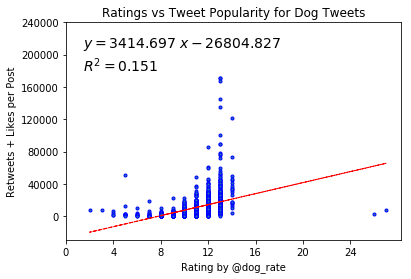

In [547]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
x=dfdog.rating_numerator
y=dfdog.popularity

plt.plot(x,y,".", ms=6, mec="b")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)

plt.xticks(np.arange(0, 28, 4))
plt.yticks(np.arange(0, 250000, 40000)) 

plt.title("Ratings vs Tweet Popularity for Dog Tweets")
plt.xlabel("Rating by @dog_rate")
plt.ylabel("Retweets + Likes per Post")

text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top');

plt.show()


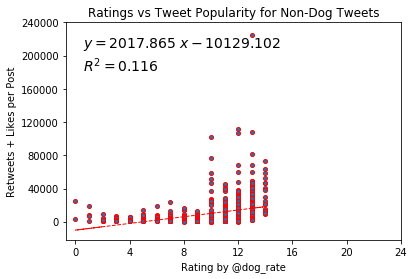

In [548]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
x=dfnotdog.rating_numerator
y=dfnotdog.popularity

plt.plot(x,y,".", ms=8, mec="r")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)

plt.xticks(np.arange(0, 28, 4))
plt.yticks(np.arange(0, 250000, 40000)) 

plt.title("Ratings vs Tweet Popularity for Non-Dog Tweets")
plt.xlabel("Rating by @dog_rate")
plt.ylabel("Retweets + Likes per Post")

text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top');



plt.show()


The visuals suggest that non-dog posts tend to have slightly lower ratings than dog tweets and also less engagement from followers. Neither group shows that ratings correlate with popularity, as both R2 are fairly low. 

### Question 2: What are the 10 most common breeds in the data set?  

In [549]:
top10=df.breed.value_counts().nlargest(10).to_frame()
top10

,breed
golden_retriever,138
Labrador_retriever,93
Pembroke,88
Chihuahua,79
pug,54
chow,41
Samoyed,39
Pomeranian,38
toy_poodle,37
malamute,29


In [550]:
top10.sum()

breed    636
dtype: int64

When contrasted with the top 10 breeds, as informed by the american kennel club, the intersection with the dataset is only 3 breeds: golden retriever, pembroke and labrador retriever. Hence, some less popular breeds are overepresented in the dataset. Some very popular breeds missing from the top 10 are german sheppard, bulldog and french buldog.

### Question 3: Which breeds are the most popular with followers @dog_rate?

In [551]:
dfdog.breed.nunique()

110

**110 breeds are represented in the dataset**

**We can start answering this question by assesing the popularity among followers, since the number of retweets and likes are provided by them.**

In [552]:
pop_by_breed=dfdog.groupby('breed').popularity.sum().to_frame('popularity').reset_index()

In [553]:
pop_by_breed.set_index('breed', inplace=True)

In [554]:
pop_by_breed.popularity.nlargest(10).to_frame()

,popularity
breed,
golden_retriever,1642201
Pembroke,1084171
Labrador_retriever,744009
Chihuahua,567966
French_bulldog,425179
Samoyed,401270
chow,337750
cocker_spaniel,298691
Eskimo_dog,289253


We are seeing some new breeds like chihuahua, the french bulldog, the chow, cocker spaniel among the most popular, when we take into acount the number of likes and retweets. We should look into the average popularity (favorites + retweets) per tweet to see which dog breeds are the most popular among the followers of the account.

I'll incorporate the number of dogs per breed into the dataset to perform various calculations in this section.

In [555]:
dogs_by_breed=dfdog.groupby('breed').popularity.count().to_frame('popularity').reset_index()

In [556]:
dogs_by_breed.set_index('breed', inplace=True)

In [557]:
dogs_by_breed=dogs_by_breed.rename(columns={'popularity':'n_dogs_by_breed'})

In [558]:
dogs_by_breed.head(3)

,n_dogs_by_breed
breed,
Afghan_hound,2
Airedale,10
American_Staffordshire_terrier,12


In [559]:
dfw =pop_by_breed.merge(dogs_by_breed, left_on='breed', right_on='breed', how='inner')

In [560]:
dfw.head(3)

,popularity,n_dogs_by_breed
breed,,
Afghan_hound,27560,2
Airedale,67896,10
American_Staffordshire_terrier,85140,12


In [561]:
avg_pop_tweet=dfw.popularity/dfw.n_dogs_by_breed

**Let's include this variable in the dataframe for future use in the visuals.**

In [562]:
dfw['avg_pop_tweet']=avg_pop_tweet

In [563]:
dfw.head(3)

,popularity,n_dogs_by_breed,avg_pop_tweet
breed,,,
Afghan_hound,27560,2,13780.0
Airedale,67896,10,6789.6
American_Staffordshire_terrier,85140,12,7095.0


In [564]:
dfw.avg_pop_tweet.nlargest(10).to_frame()

,avg_pop_tweet
breed,
Irish_water_spaniel,27571.000000
standard_poodle,25968.800000
Saluki,25911.500000
French_bulldog,22377.842105
Eskimo_dog,20660.928571
English_springer,19052.666667
flat-coated_retriever,18941.750000
black-and-tan_coonhound,18687.000000
Lakeland_terrier,18256.076923


When the average popularity per tweet is applied, less common dogs in the data set like the irish water spaniel, standard poodle and saluki. The french_bulldog, a popular dog among the american kennel rankings is also popular with the followers of @dog_rate.

### Question 4: How to understand the rating system? Is it really rating or is it just for fun? 

We saw earlier that all tweets were posted from one account. Therefore, only the owner of the account is asigning the ratings @dog rate. I'll estimate the average rating per breed. I'm creating it inside a new dataframe to merge with the previous one to have one df by breed for all the visuals. I'm using the numerator only.

In [565]:
rating_by_breed=dfdog.groupby('breed').rating_numerator.mean().to_frame('rating_numerator').reset_index()

In [566]:
rating_by_breed.set_index('breed', inplace=True)

In [567]:
rating_by_breed=rating_by_breed.rename(columns={'rating_numerator':'avg_rating_by_breed'})

In [568]:
rating_by_breed.head()

,avg_rating_by_breed
breed,
Afghan_hound,8.000000
Airedale,10.200000
American_Staffordshire_terrier,10.833333
Appenzeller,9.000000
Australian_terrier,11.500000


In [569]:
rating_by_breed.describe()

,avg_rating_by_breed
count,110.000000
mean,10.811917
std,1.875986
min,5.000000
25%,10.250000
50%,10.816667
75%,11.312500
max,27.000000


The average rating by breed is close to 11 points, and the 25th percentile is above 10. This points to it being a pretty favorable scale for all dogs.

In [570]:
rating_by_breed.avg_rating_by_breed.nlargest(10).to_frame()

,avg_rating_by_breed
breed,
clumber,27.000000
Saluki,12.500000
Irish_setter,12.333333
briard,12.333333
Tibetan_mastiff,12.250000
kuvasz,12.181818
Border_terrier,12.142857
Irish_water_spaniel,12.000000
giant_schnauzer,12.000000


We see some exotic breeds like the clumber and saluki, but this might have to do with the number of posts per dog (a few posts might have gotten really really good ratings). We will merge this with the previous data frame to have a closer look at this and to create a visual.

In [572]:
dfv=dfw.merge(rating_by_breed, left_on='breed', right_on='breed', how='inner')

*Let's look at the average rating per tweet againg*

In [575]:
dfv.sort_values(by='avg_rating_by_breed', ascending=False).head(10)

,popularity,n_dogs_by_breed,avg_pop_tweet,avg_rating_by_breed
breed,,,,
clumber,7996,1,7996.000000,27.000000
Saluki,103646,4,25911.500000,12.500000
briard,32665,3,10888.333333,12.333333
Irish_setter,26448,3,8816.000000,12.333333
Tibetan_mastiff,56890,4,14222.500000,12.250000
kuvasz,65261,11,5932.818182,12.181818
Border_terrier,104806,7,14972.285714,12.142857
giant_schnauzer,42537,3,14179.000000,12.000000
standard_schnauzer,2535,1,2535.000000,12.000000


Indeed some of the hightest average ratings have very few tweets.

In [576]:
dfv= dfv.reset_index()

In [577]:
dfv.head(3)

,breed,popularity,n_dogs_by_breed,avg_pop_tweet,avg_rating_by_breed
0,Afghan_hound,27560,2,13780.0,8.000000
1,Airedale,67896,10,6789.6,10.200000
2,American_Staffordshire_terrier,85140,12,7095.0,10.833333


Now, a scatterplot of ave_rating_by_breed against avg_pop_by_tweet

In [578]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 

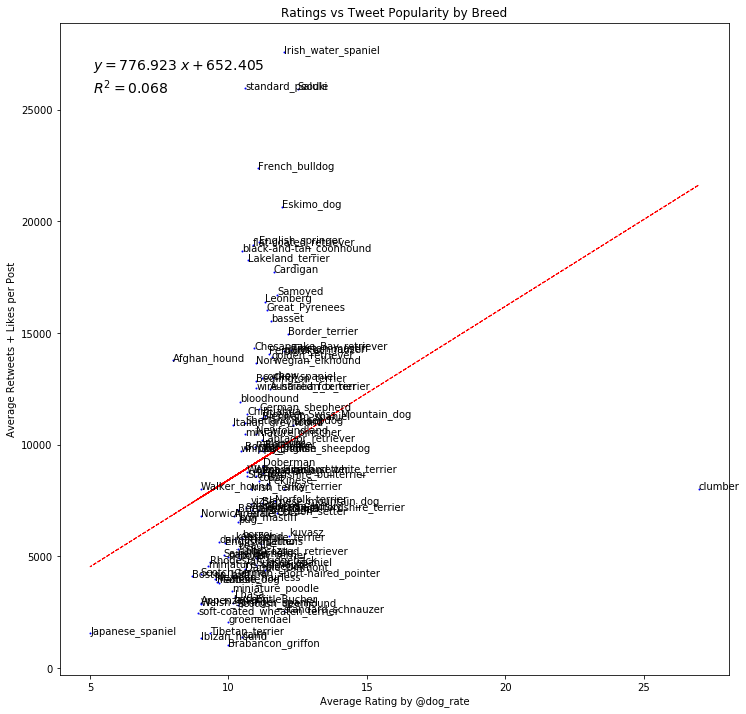

In [584]:
from sklearn.metrics import r2_score

x = dfv['avg_rating_by_breed']
y = dfv['avg_pop_tweet']
annotations=dfv['breed']
plt.figure(figsize=(12,12))

plt.plot(x,y,".", ms=2, mec="b")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)

plt.title("Ratings vs Tweet Popularity by Breed")
plt.xlabel("Average Rating by @dog_rate")
plt.ylabel("Average Retweets + Likes per Post")
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))

text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top');

The R2 is low, at 0.068. Hence, the relationship between what the account owner assigns as a rating and what the followers rate with their likes and retweets is, almost non existent. We see that most breeds are clustered between 10 and 12.

However, there are a few favored breeds by both @dog_rates and follower, that can be easily distinguished from the plot: standard poodle,irish water spaniel, saluki, french bulldog and the eskimo dog. Also, @dog_rates is much more fond of the clumber than their followers.    

Another way of approximating these "favorite breeds" is to assign a ranking for both variables, add the rankings and pick the lowest 10 of the sum.

In [585]:
dfv['rank_avg_pop_tweet'] = dfv['avg_pop_tweet'].rank(ascending = False) 

In [586]:
dfv.head()

,breed,popularity,n_dogs_by_breed,avg_pop_tweet,avg_rating_by_breed,rank_avg_pop_tweet
0,Afghan_hound,27560,2,13780.0,8.000000,21.0
1,Airedale,67896,10,6789.6,10.200000,68.0
2,American_Staffordshire_terrier,85140,12,7095.0,10.833333,63.0
3,Appenzeller,2910,1,2910.0,9.000000,100.0
4,Australian_terrier,25027,2,12513.5,11.500000,27.0


In [587]:
dfv['rank_avg_rating_by_breed'] = dfv['avg_rating_by_breed'].rank(ascending = False) 

In [588]:
dfv.head()

,breed,popularity,n_dogs_by_breed,avg_pop_tweet,avg_rating_by_breed,rank_avg_pop_tweet,rank_avg_rating_by_breed
0,Afghan_hound,27560,2,13780.0,8.000000,21.0,109.0
1,Airedale,67896,10,6789.6,10.200000,68.0,84.0
2,American_Staffordshire_terrier,85140,12,7095.0,10.833333,63.0,55.0
3,Appenzeller,2910,1,2910.0,9.000000,100.0,103.5
4,Australian_terrier,25027,2,12513.5,11.500000,27.0,20.0


In [589]:
total_rank=dfv.rank_avg_rating_by_breed+dfv.rank_avg_pop_tweet

In [590]:
dfv['total_rank']=total_rank

In [591]:
dfv.sort_values("total_rank", inplace = True)

In [592]:
favorites=dfv[['breed','total_rank']]

In [593]:
favorites.head(20)

,breed,total_rank
52,Saluki,5.0
32,Irish_water_spaniel,10.5
21,Eskimo_dog,17.0
61,Tibetan_mastiff,22.0
9,Border_terrier,22.0
53,Samoyed,24.5
13,Cardigan,26.0
86,giant_schnauzer,27.5
69,basset,33.0
27,Great_Pyrenees,36.0


The saluki, the irish_water_spaniel and the eskimo dog are the favorite breeds, when considering both @dog rates and follower preferences.

### Question 5: Is there are relationship between length of tweet and rating, as a proxy for enthusiam?

In [595]:
tweetmean=dfdog.groupby('breed').tweetlength.mean()

In [596]:
tweetmean.nlargest(20).to_frame()

,tweetlength
breed,
black-and-tan_coonhound,139.000000
groenendael,139.000000
Rhodesian_ridgeback,137.333333
clumber,137.000000
Scotch_terrier,136.000000
Dandie_Dinmont,134.600000
Australian_terrier,134.000000
Gordon_setter,133.250000
curly-coated_retriever,133.000000


After visual inspection, only one the top 20 breeds favorite breeds is also in the top 20 in tweet lenght, the french_bulldog. There doesn't seem to be much of a relationship between popularity and tweet length.

### Question 6: Do other variables give us any more insight?

#### Does most popular name matter? 

In [597]:
df.name.value_counts().nlargest(10)

None       643
Oliver      10
Cooper      10
Charlie     10
Lucy         9
Tucker       9
Penny        9
Winston      8
Sadie        8
Daisy        7
Name: name, dtype: int64

Anecdotally, Oliver and Cooper are the most popular name. Yet there aren't enough observations to do any type of serious cross sectional analysis with breeds, ratings or popularity. There are 643 missing observations.

#### Do the categories like "pupper" or "floofer" provide additional information?

In [598]:
df.groupby('breed').pupper.sum().nlargest(10)

breed
golden_retriever      20
Pembroke              10
Labrador_retriever     9
pug                    8
Chihuahua              6
Pomeranian             6
Lakeland_terrier       5
toy_poodle             5
Samoyed                4
porcupine              4
Name: pupper, dtype: int64

In [599]:
df.groupby('breed').doggo.sum().nlargest(10)

breed
golden_retriever      13
Labrador_retriever     6
German_shepherd        3
Bedlington_terrier     2
Great_Pyrenees         2
Pembroke               2
Pomeranian             2
cocker_spaniel         2
dalmatian              2
Blenheim_spaniel       1
Name: doggo, dtype: int64

Pupper is the category with most observations among the four. The top three breeds for this category also reflect the top 3 breeds in the dataset. So it's just really giving us the same "volume" message as question 1. A similar conclusion applies for doggo.

In [600]:
df.groupby('breed').floofer.sum().nlargest(10)

breed
Samoyed                    2
English_springer           1
Lhasa                      1
Pomeranian                 1
chow                       1
golden_retriever           1
wire-haired_fox_terrier    1
Afghan_hound               0
African_crocodile          0
African_grey               0
Name: floofer, dtype: int64

In [601]:
df.groupby('breed').puppo.sum().nlargest(10)

breed
Eskimo_dog                        3
Labrador_retriever                2
golden_retriever                  2
Airedale                          1
American_Staffordshire_terrier    1
Cardigan                          1
German_shepherd                   1
Italian_greyhound                 1
Lakeland_terrier                  1
Old_English_sheepdog              1
Name: puppo, dtype: int64

Categories puppo and floofer don't have enough data to contribute to the analysis.

### Conclusion

Ratings seem for the most part random and fun. Most ratings are in the 10 to 15 range, which automatically signals that it's not a traditional scale. There is some evidence that the saluki, the irish_water_spaniel and the eskimo dog are the favorite breeds, when considering both @dog rates and follower preferences.